## Reference https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape 

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

* id : id bệnh nhân
* diagnosis: M: ác tính B: lành tính 
* radius_mean: giá trị trung bình của bán kính các tế bào 
* texture_mean: độ chênh lệch giữa các giá trị xám liên tục
* perimeter_mean: giá trị trung bình của chu vi các tế bào 
* area_mean: giá trị trung bình của diện tích tế bào
* smoothness_mean: độ min của lề tế bào 
* ........................

### Radius_mean 

#### Estimate of Location

In [6]:
print("Mean: ",np.mean(data['radius_mean']))


Mean:  14.127291739894552


In [7]:
print("Median: ",np.median(data['radius_mean']))

Median:  13.37


In [8]:
print("Percentiles 25%: ",np.percentile(data['radius_mean'],25))
print("Percentiles 50%: ",np.percentile(data['radius_mean'],50))
print("Percentiles 75%: ",np.percentile(data['radius_mean'],75))

Percentiles 25%:  11.7
Percentiles 50%:  13.37
Percentiles 75%:  15.78


In [9]:
p25 = np.percentile(data['radius_mean'],25)
p75 = np.percentile(data['radius_mean'],75)
iqr = p75 - p25
lower = p25 - 1.5*iqr
upper = p75 + 1.5*iqr
outlier = [i for i in data['radius_mean'] if ((i<lower) or (i>upper))]
print("Lower bound: ",lower)
print("Upper bound: ",upper)
print("Number of Outlier: ",len(outlier))
print("Outlier: ",outlier)

Lower bound:  5.579999999999999
Upper bound:  21.9
Number of Outlier:  14
Outlier:  [25.22, 22.27, 24.25, 23.27, 27.22, 23.29, 28.11, 23.21, 23.51, 25.73, 22.01, 27.42, 23.09, 24.63]


#### Estimate of Variability

In [10]:
print("Range: ",min(data['radius_mean'])," - ",max(data['radius_mean']))

Range:  6.981  -  28.11


In [11]:
std = np.std(data['radius_mean'])
print("Standard deviation: ",std)
print("variance: ",std*std)

Standard deviation:  3.520950760711062
variance:  12.397094259351807


In [12]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Exploring the Data Distribution 

Boxplot

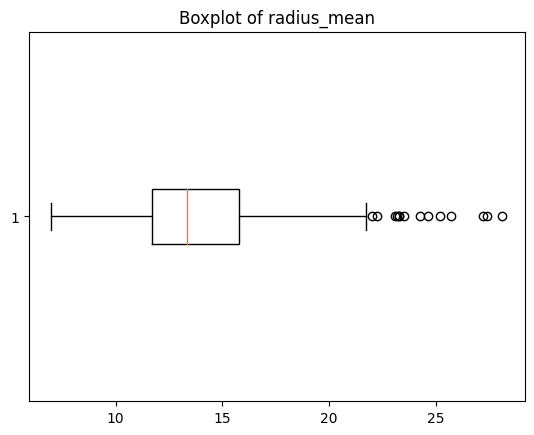

In [13]:
plt.boxplot(data['radius_mean'],vert=False)
plt.title("Boxplot of radius_mean")
plt.show()

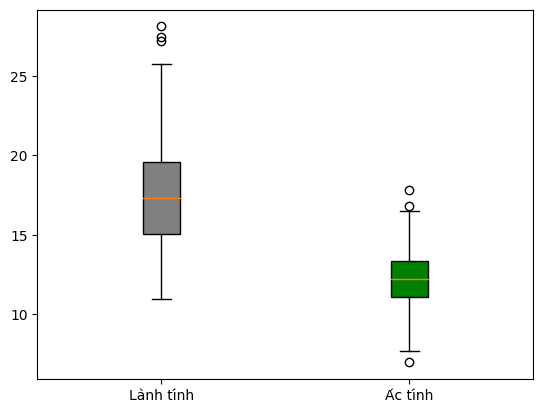

In [14]:
box = plt.boxplot([data[data['diagnosis']=='M']['radius_mean'],data[data['diagnosis']=='B']['radius_mean']],labels=['Lành tính','Ác tính'],patch_artist=True)
plt.setp(box['boxes'][0], facecolor='gray')
plt.setp(box['boxes'][1], facecolor='green')
plt.show()

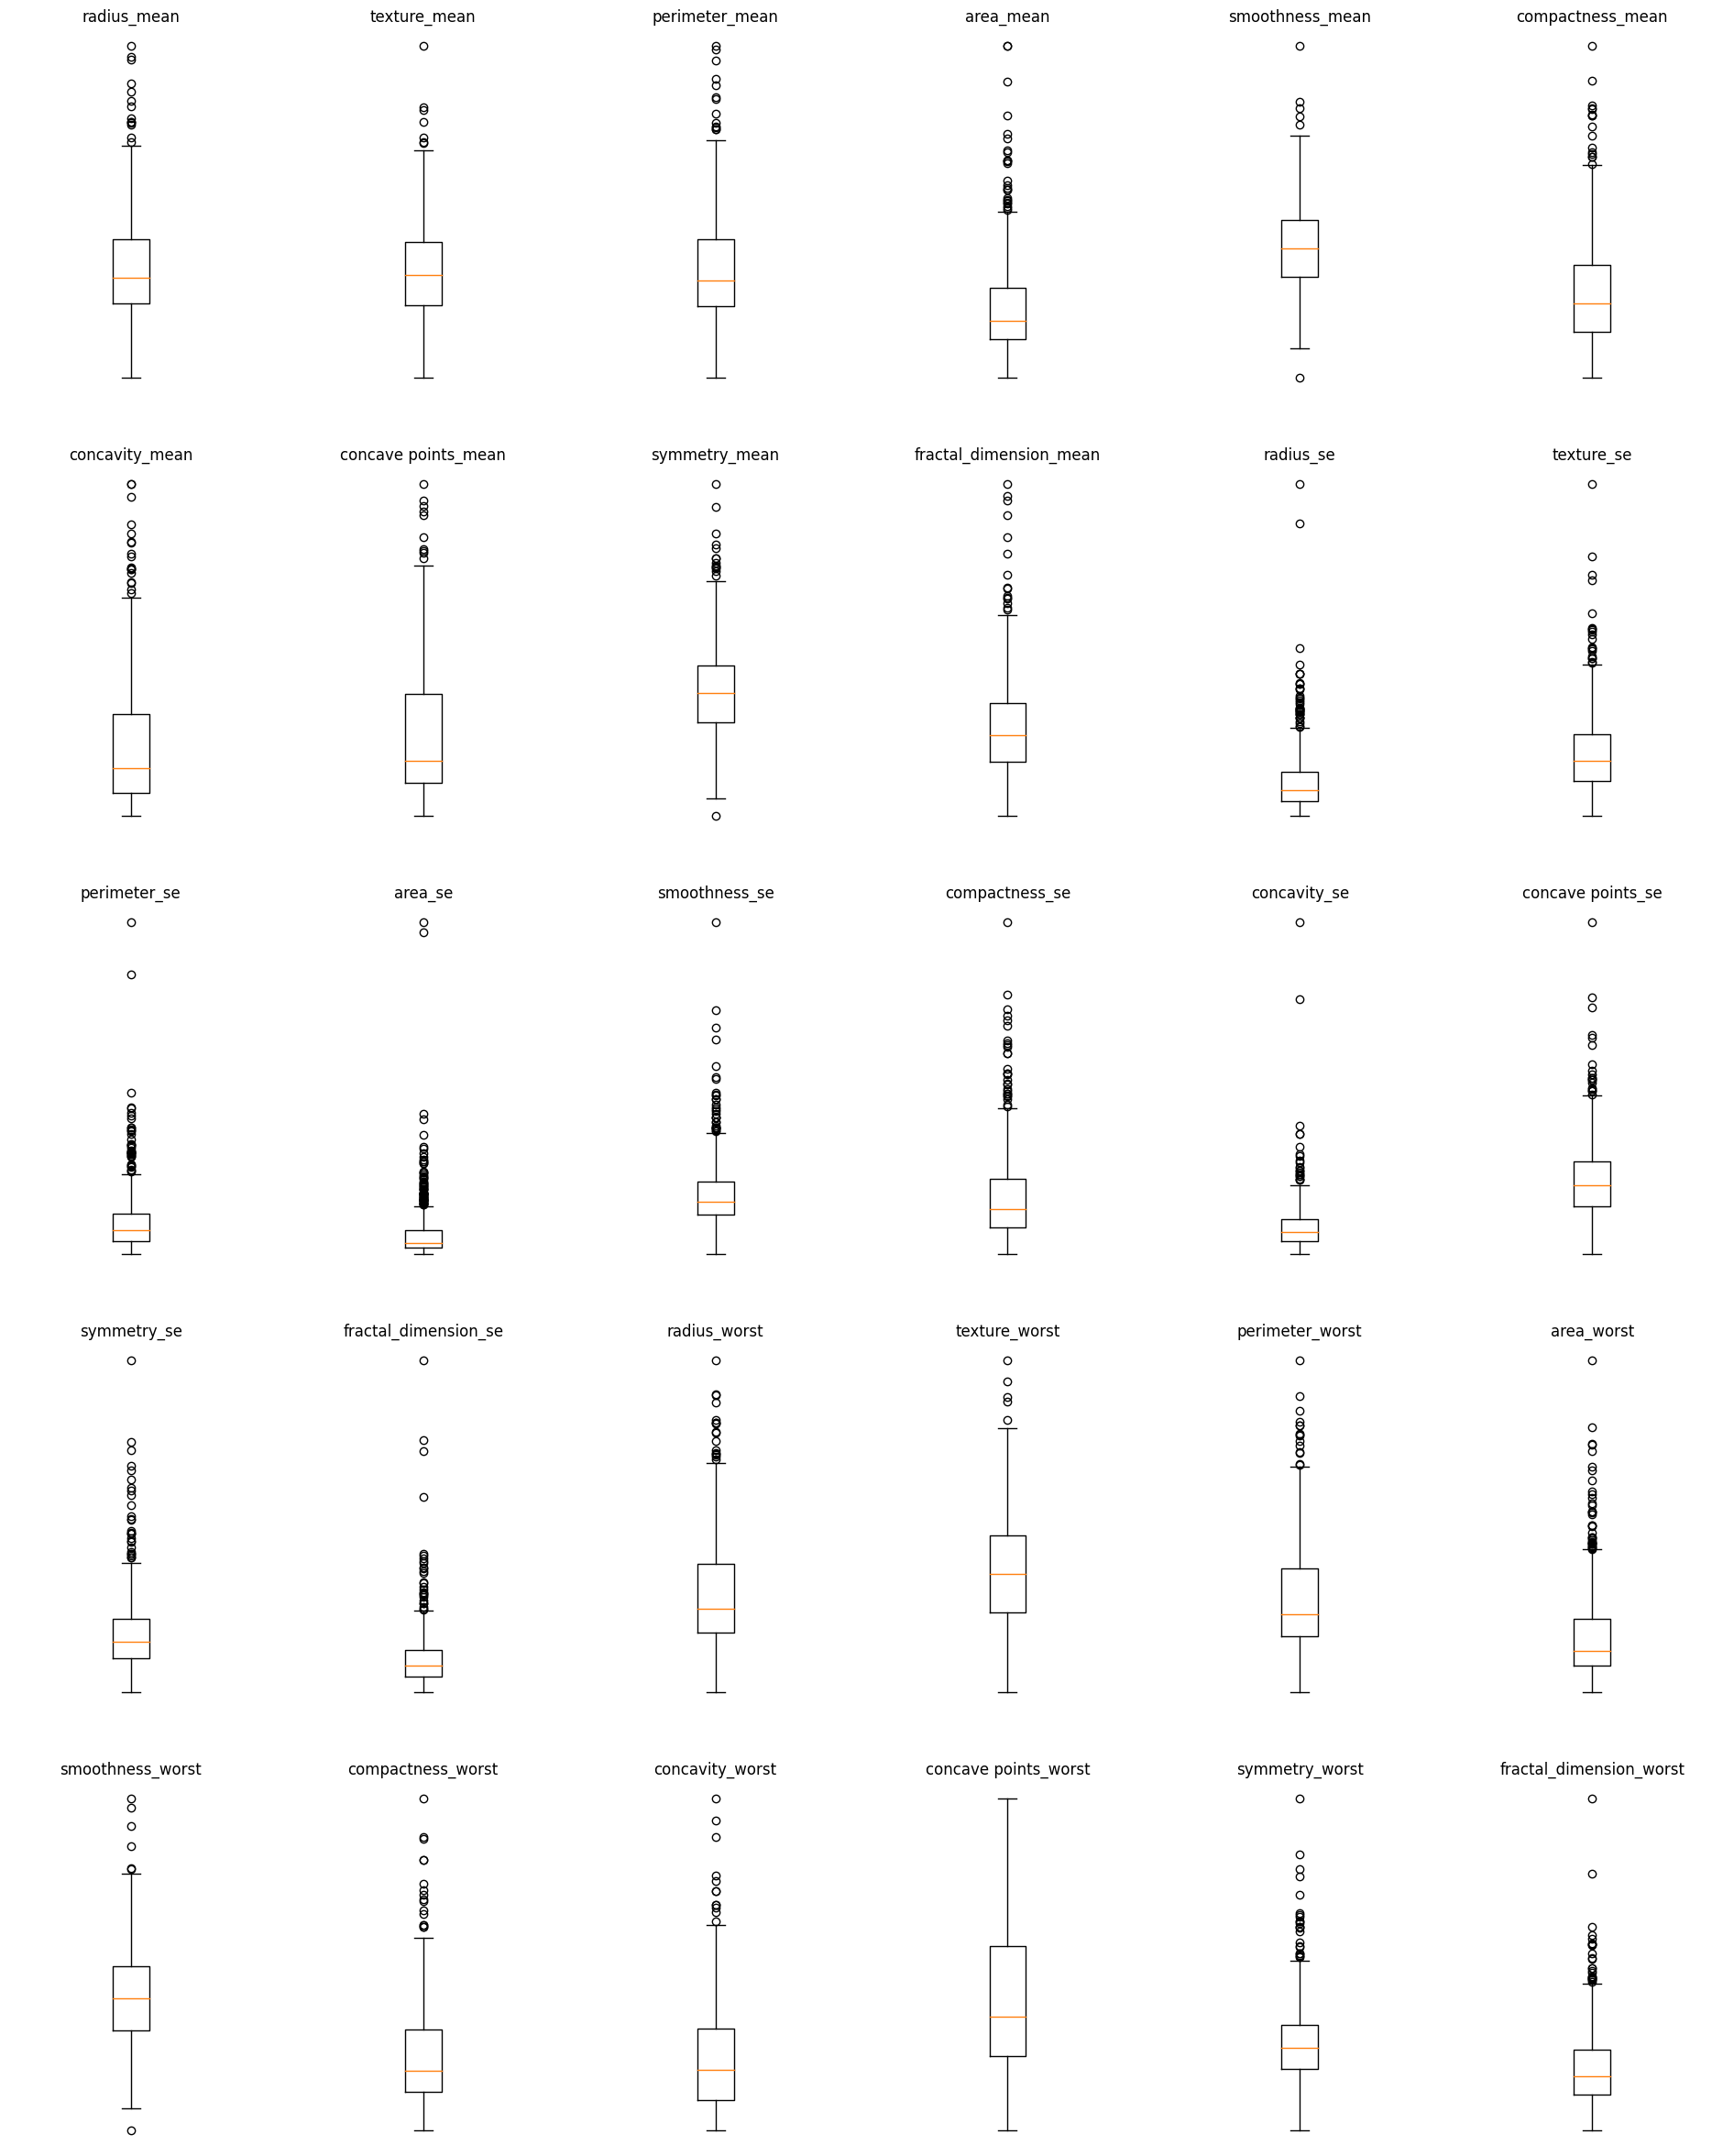

In [15]:
plt.figure(figsize=(24,30))
for i in range(2,data.shape[1]-1):
    plt.subplot(5,6,i-1)
    plt.axis(False)
    plt.title(data.columns[i])
    plt.boxplot(data.iloc[:,i])

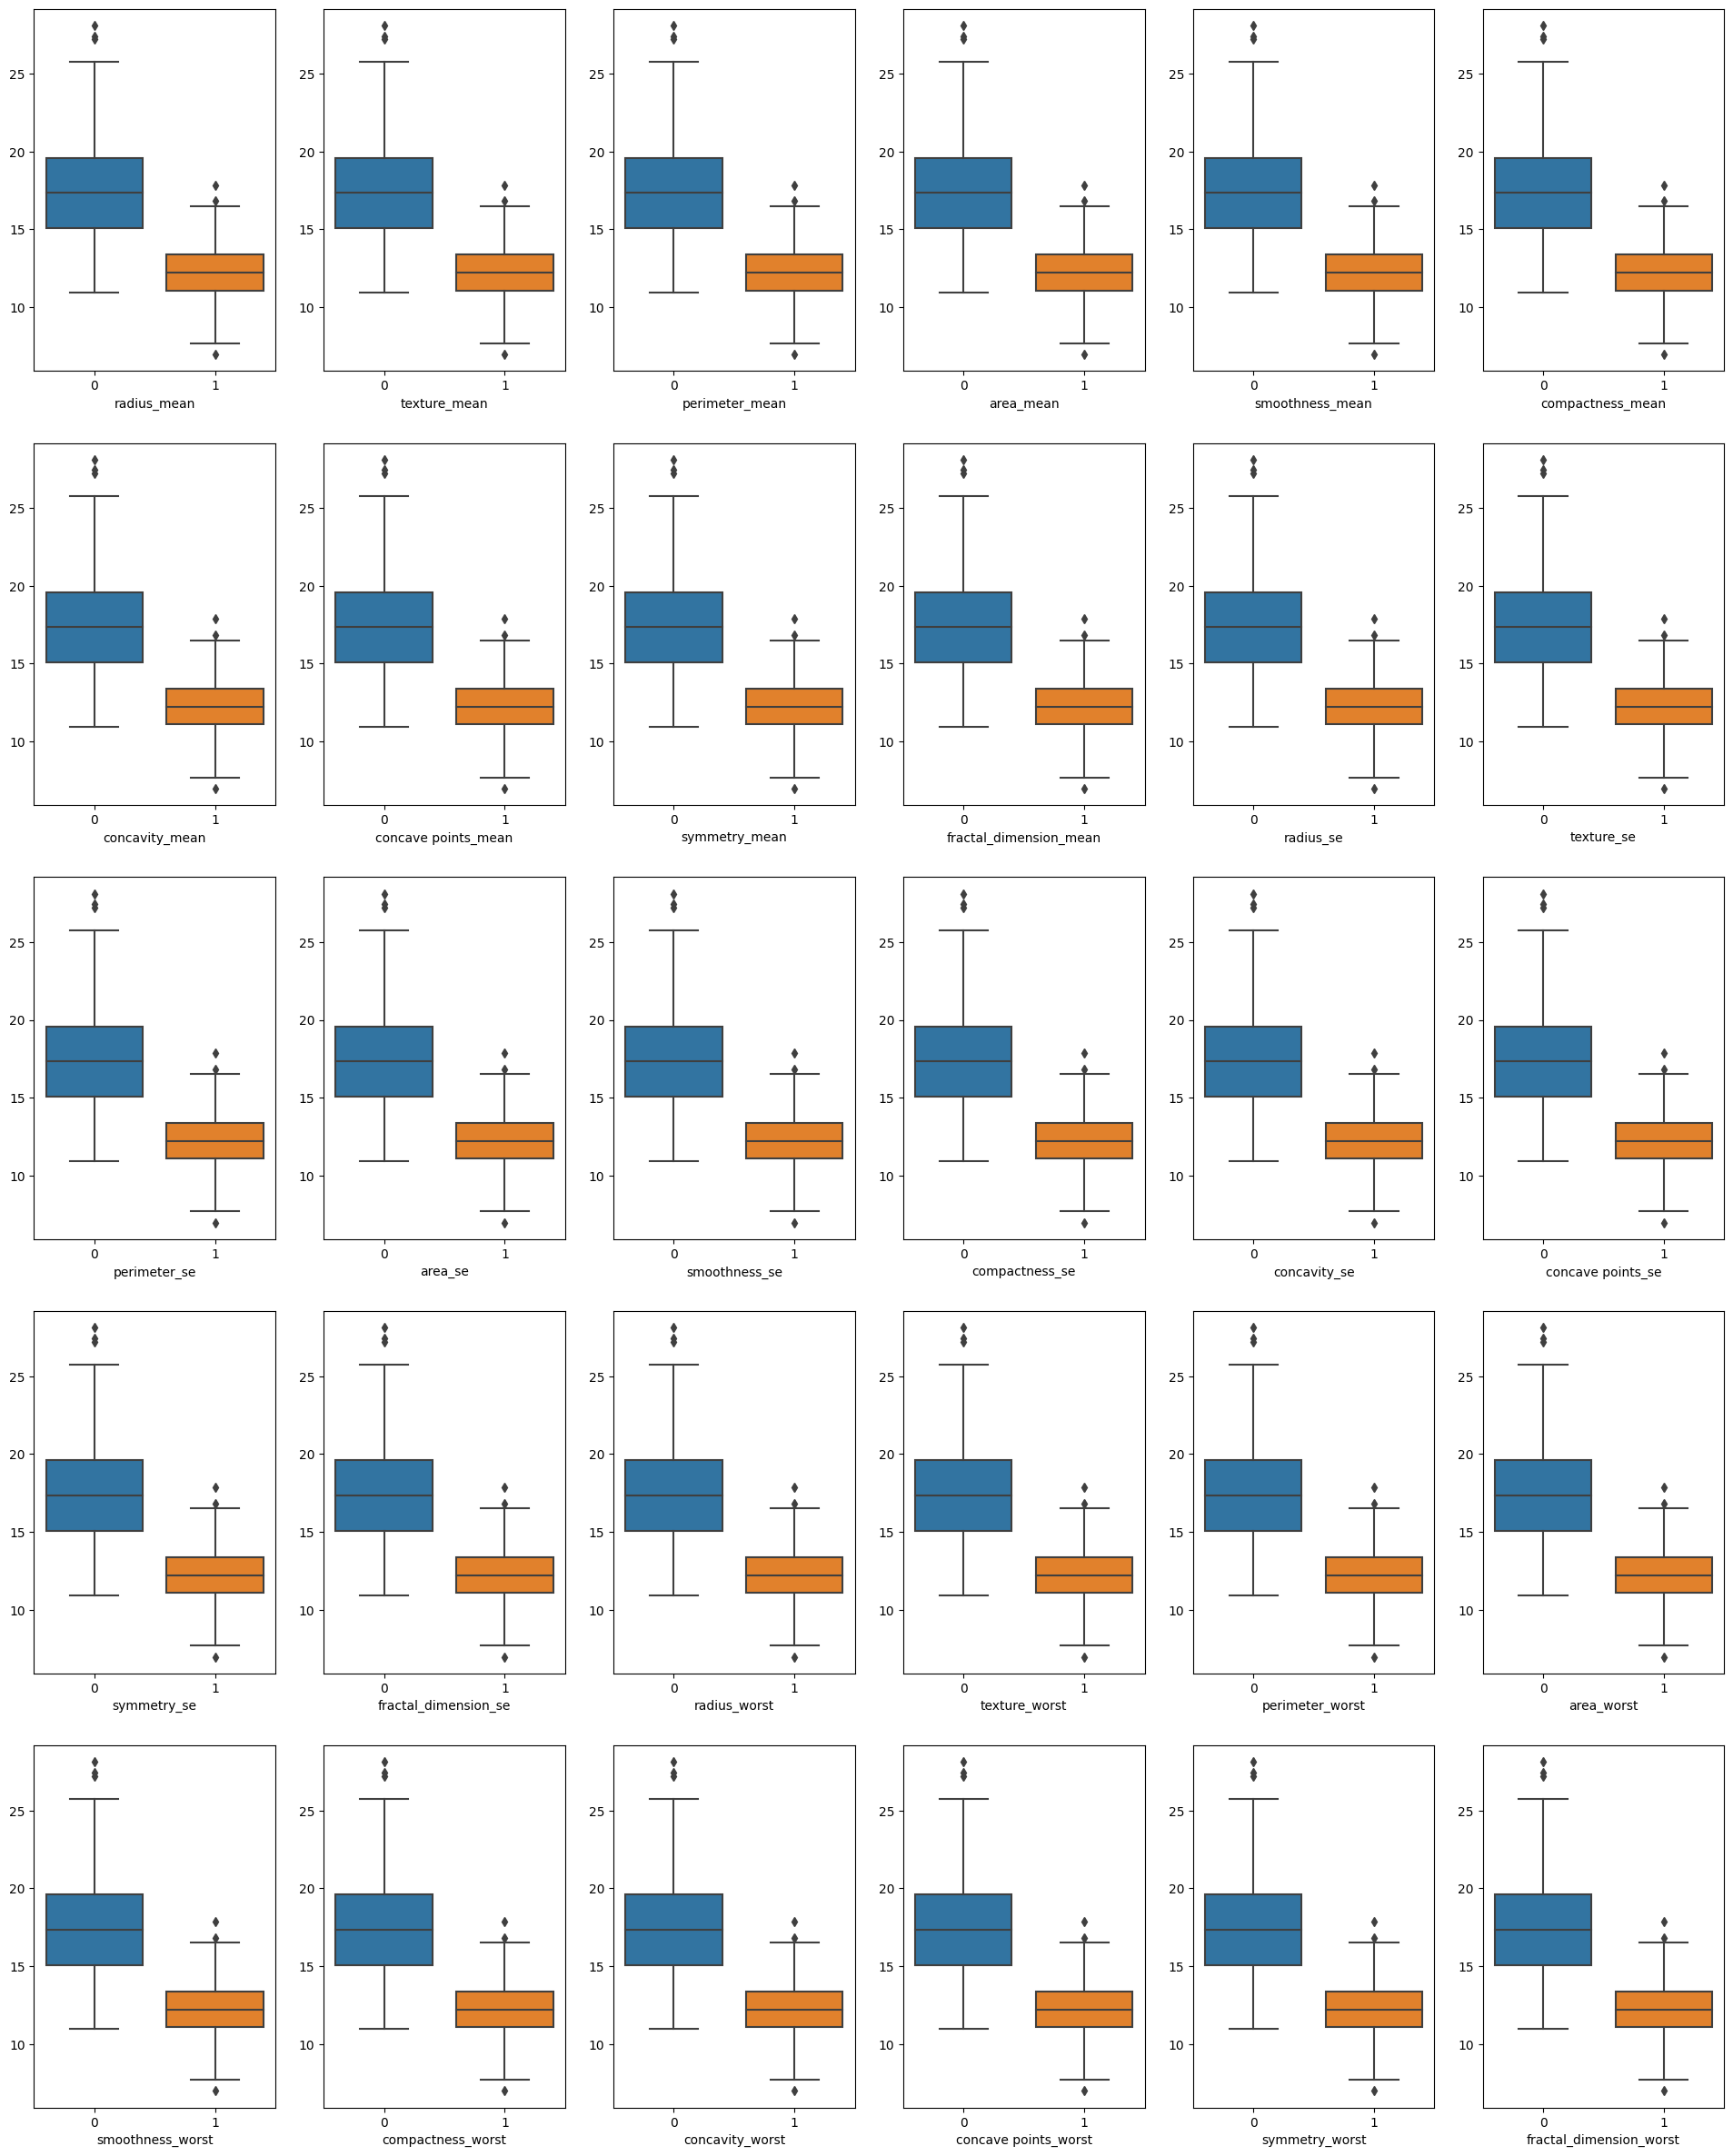

In [16]:
plt.figure(figsize=(24,30))
for i in range(2,32):
    plt.subplot(5,6,i-1)
    plt.xlabel(data.columns[i])
    sns.boxplot([data[data['diagnosis']=='M']['radius_mean'],data[data['diagnosis']=='B']['radius_mean']])

Frequency table 

In [17]:
freq = pd.Series(data['radius_mean']).value_counts()
frequency_table = pd.DataFrame({"Value":freq.index,"Frequency":freq.values})
frequency_table

,Value,Frequency
0,12.34,4
1,11.71,3
2,12.46,3
3,13.05,3
4,10.26,3
...,...,...
451,12.23,1
452,14.45,1
453,19.18,1
454,18.08,1


In [18]:
round_data = np.round(data['radius_mean']).astype(int)
freq = pd.Series(round_data).value_counts()
frequency_table = pd.DataFrame({"Value":freq.index,"Frequency":freq.values})
frequency_table

,Value,Frequency
0,12,91
1,13,81
2,14,67
3,11,59
4,15,53
5,10,37
6,16,29
7,20,26
8,18,23
9,9,22


Histogram plot

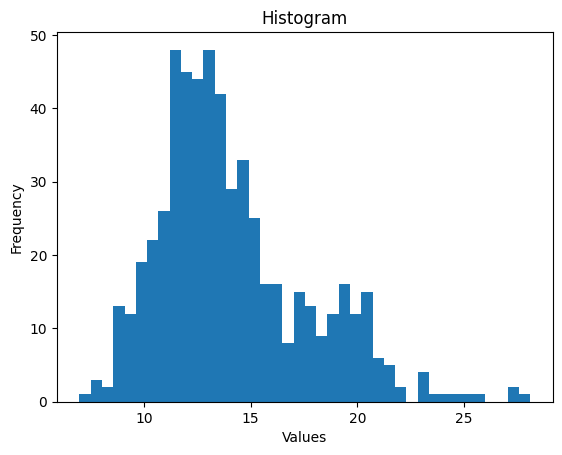

In [19]:
plt.hist(data['radius_mean'],bins = 40)
plt.title("Histogram")
plt.ylabel("Frequency")
plt.xlabel("Values")
plt.show()

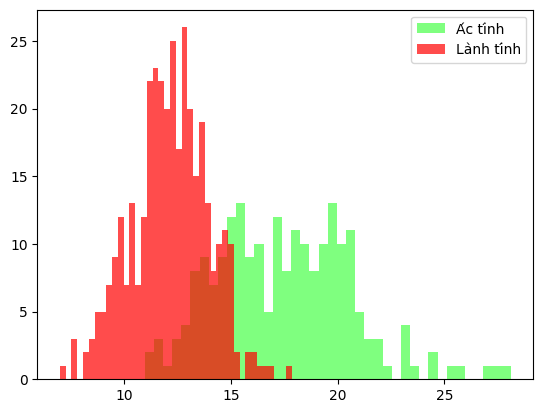

In [20]:
m = plt.hist(data[data['diagnosis']=='M']['radius_mean'],bins=40,fc=(0,1,0,0.5),label = 'Ác tính')
b = plt.hist(data[data['diagnosis']=='B']['radius_mean'],bins=40,fc=(1,0,0,0.7),label='Lành tính')
plt.legend()
plt.show()

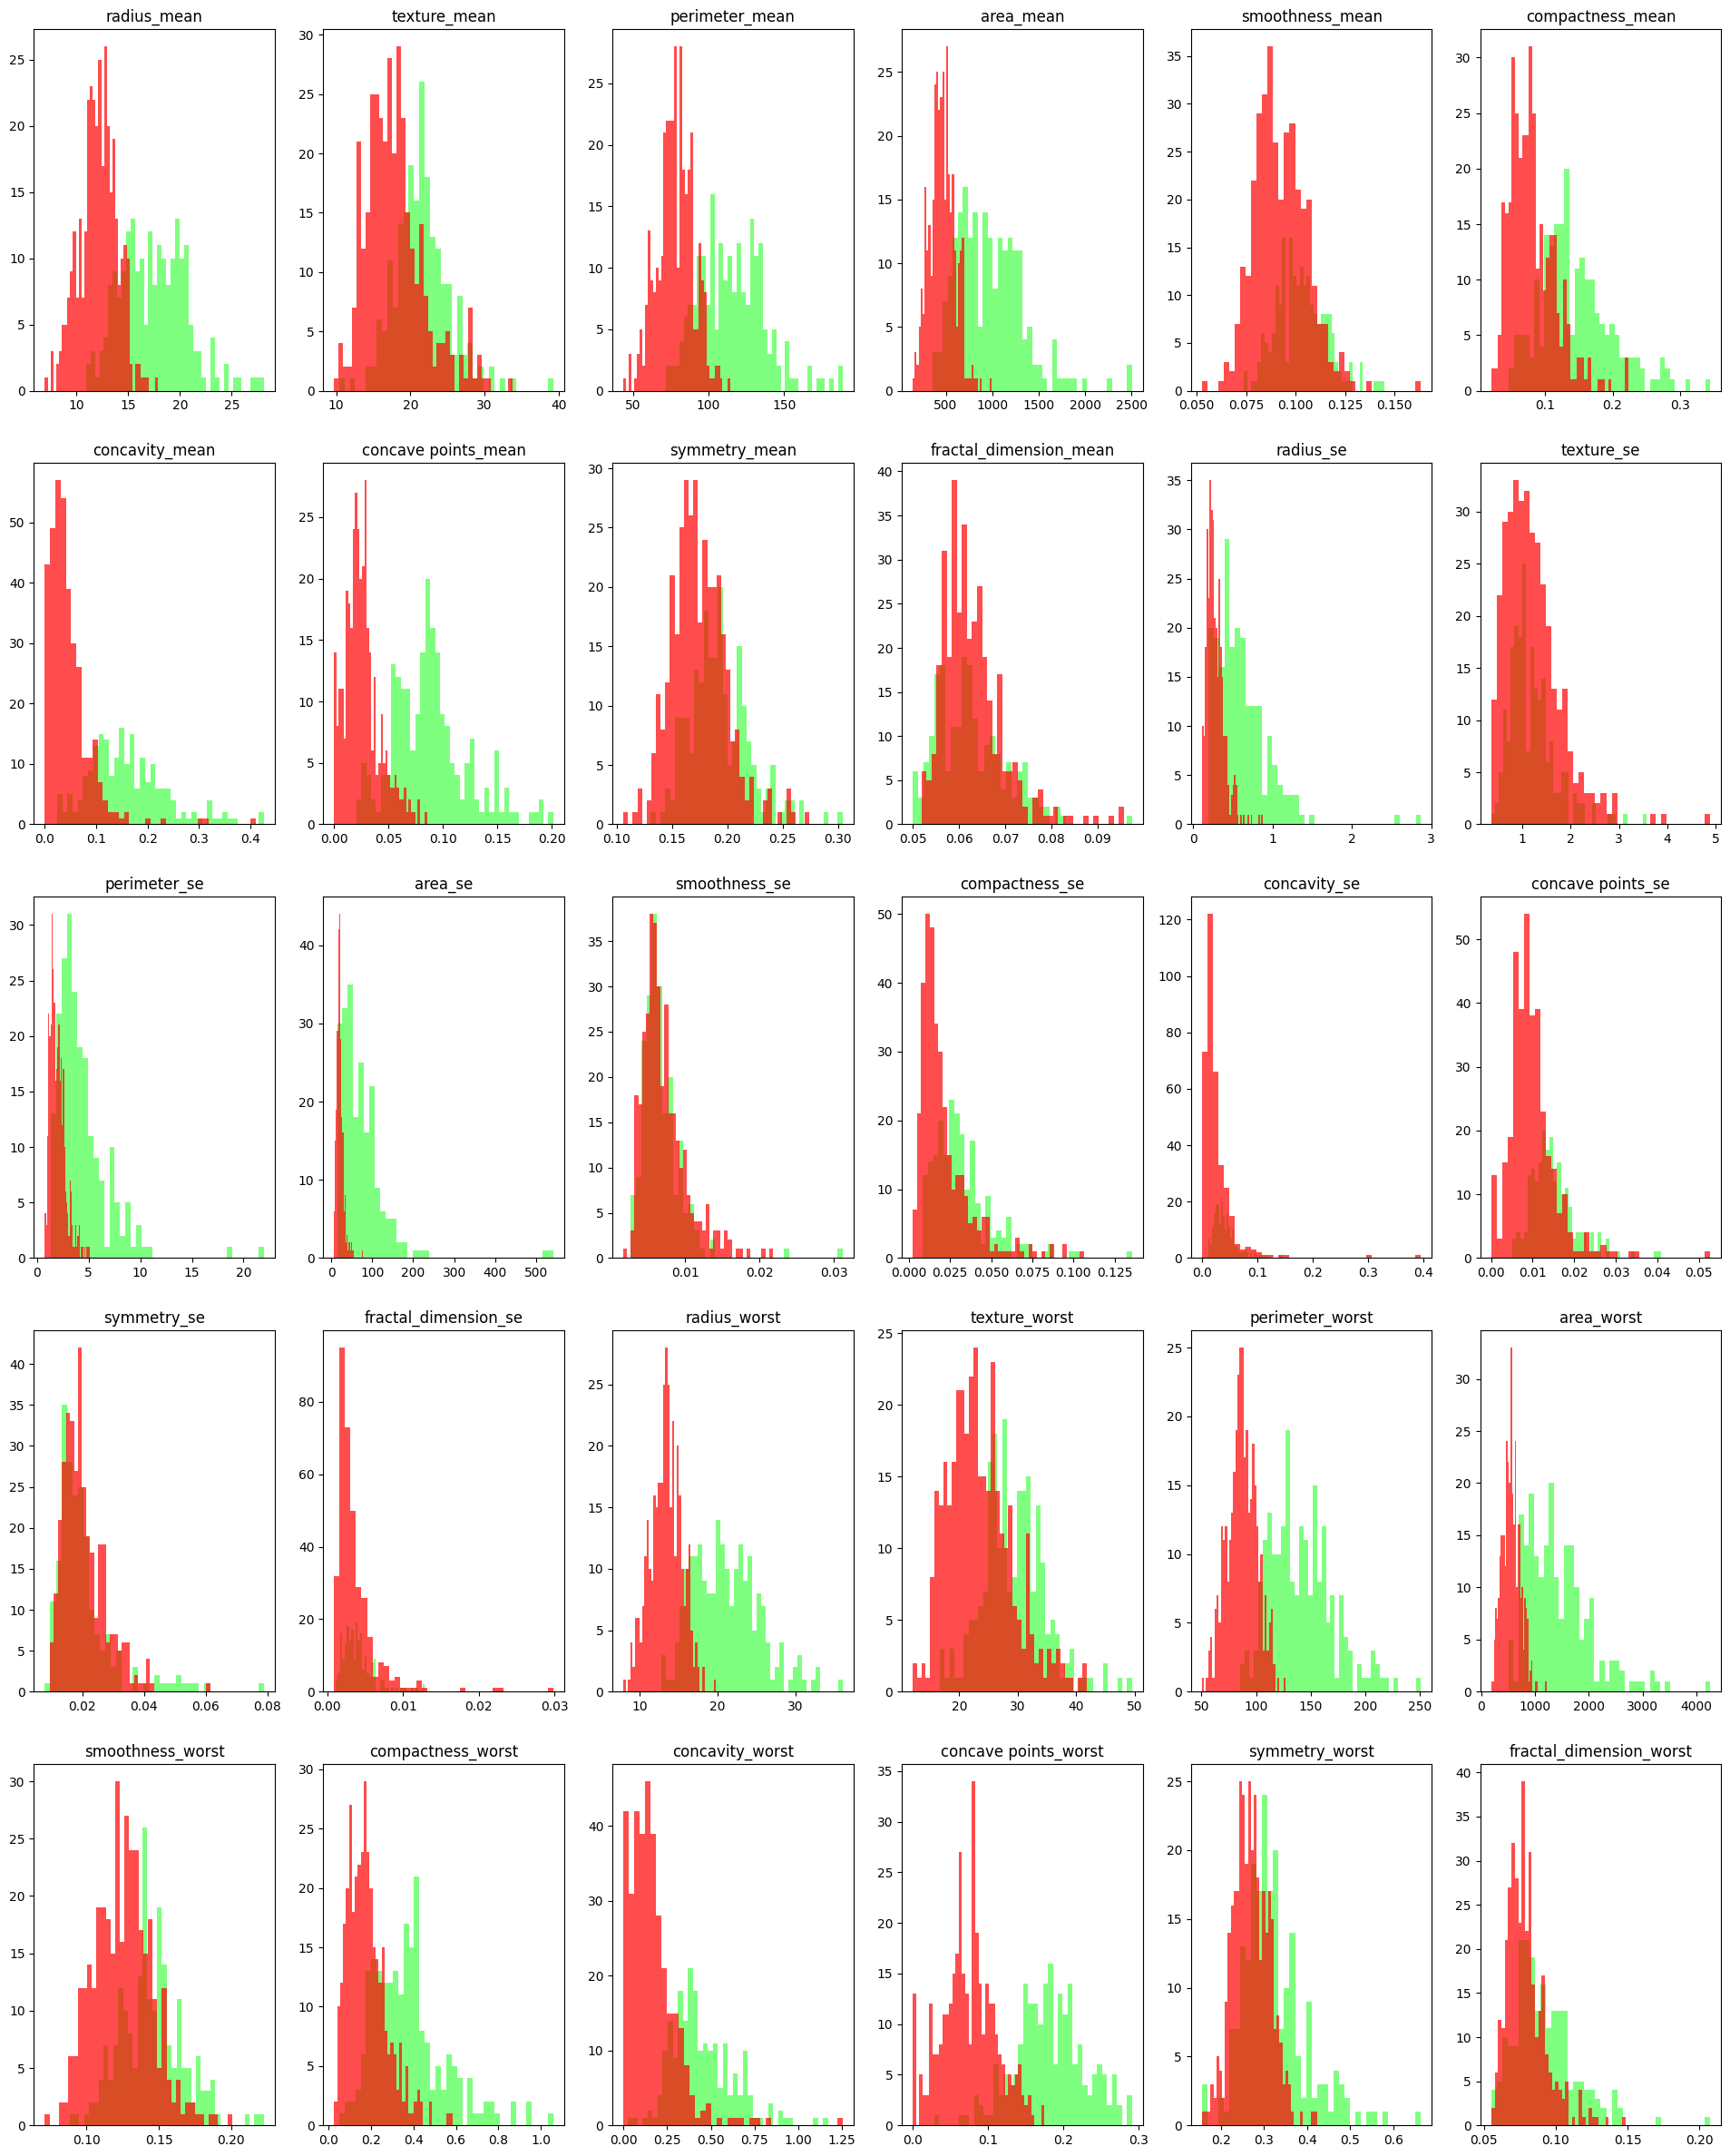

In [21]:
plt.figure(figsize=(24,30))
for i in range(2,data.shape[1]-1):
    plt.subplot(5,6,i-1)
    m = plt.hist(data[data['diagnosis']=='M'][data.columns[i]],bins=40,fc=(0,1,0,0.5),label = 'Ác tính')
    b = plt.hist(data[data['diagnosis']=='B'][data.columns[i]],bins=40,fc=(1,0,0,0.7),label='Lành tính')
    plt.title(data.columns[i])

Density Estimates

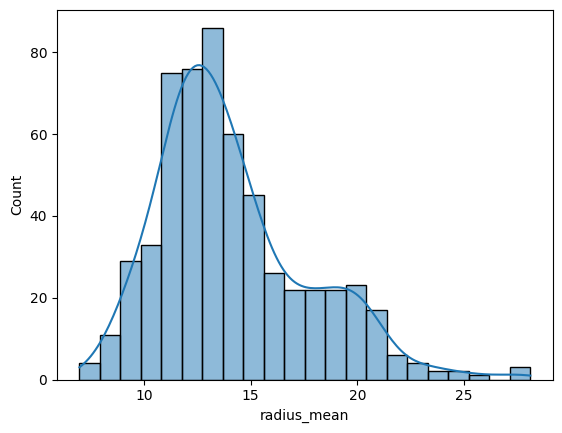

In [22]:
sns.histplot(data['radius_mean'],kde=True,alpha=0.5)
plt.show()

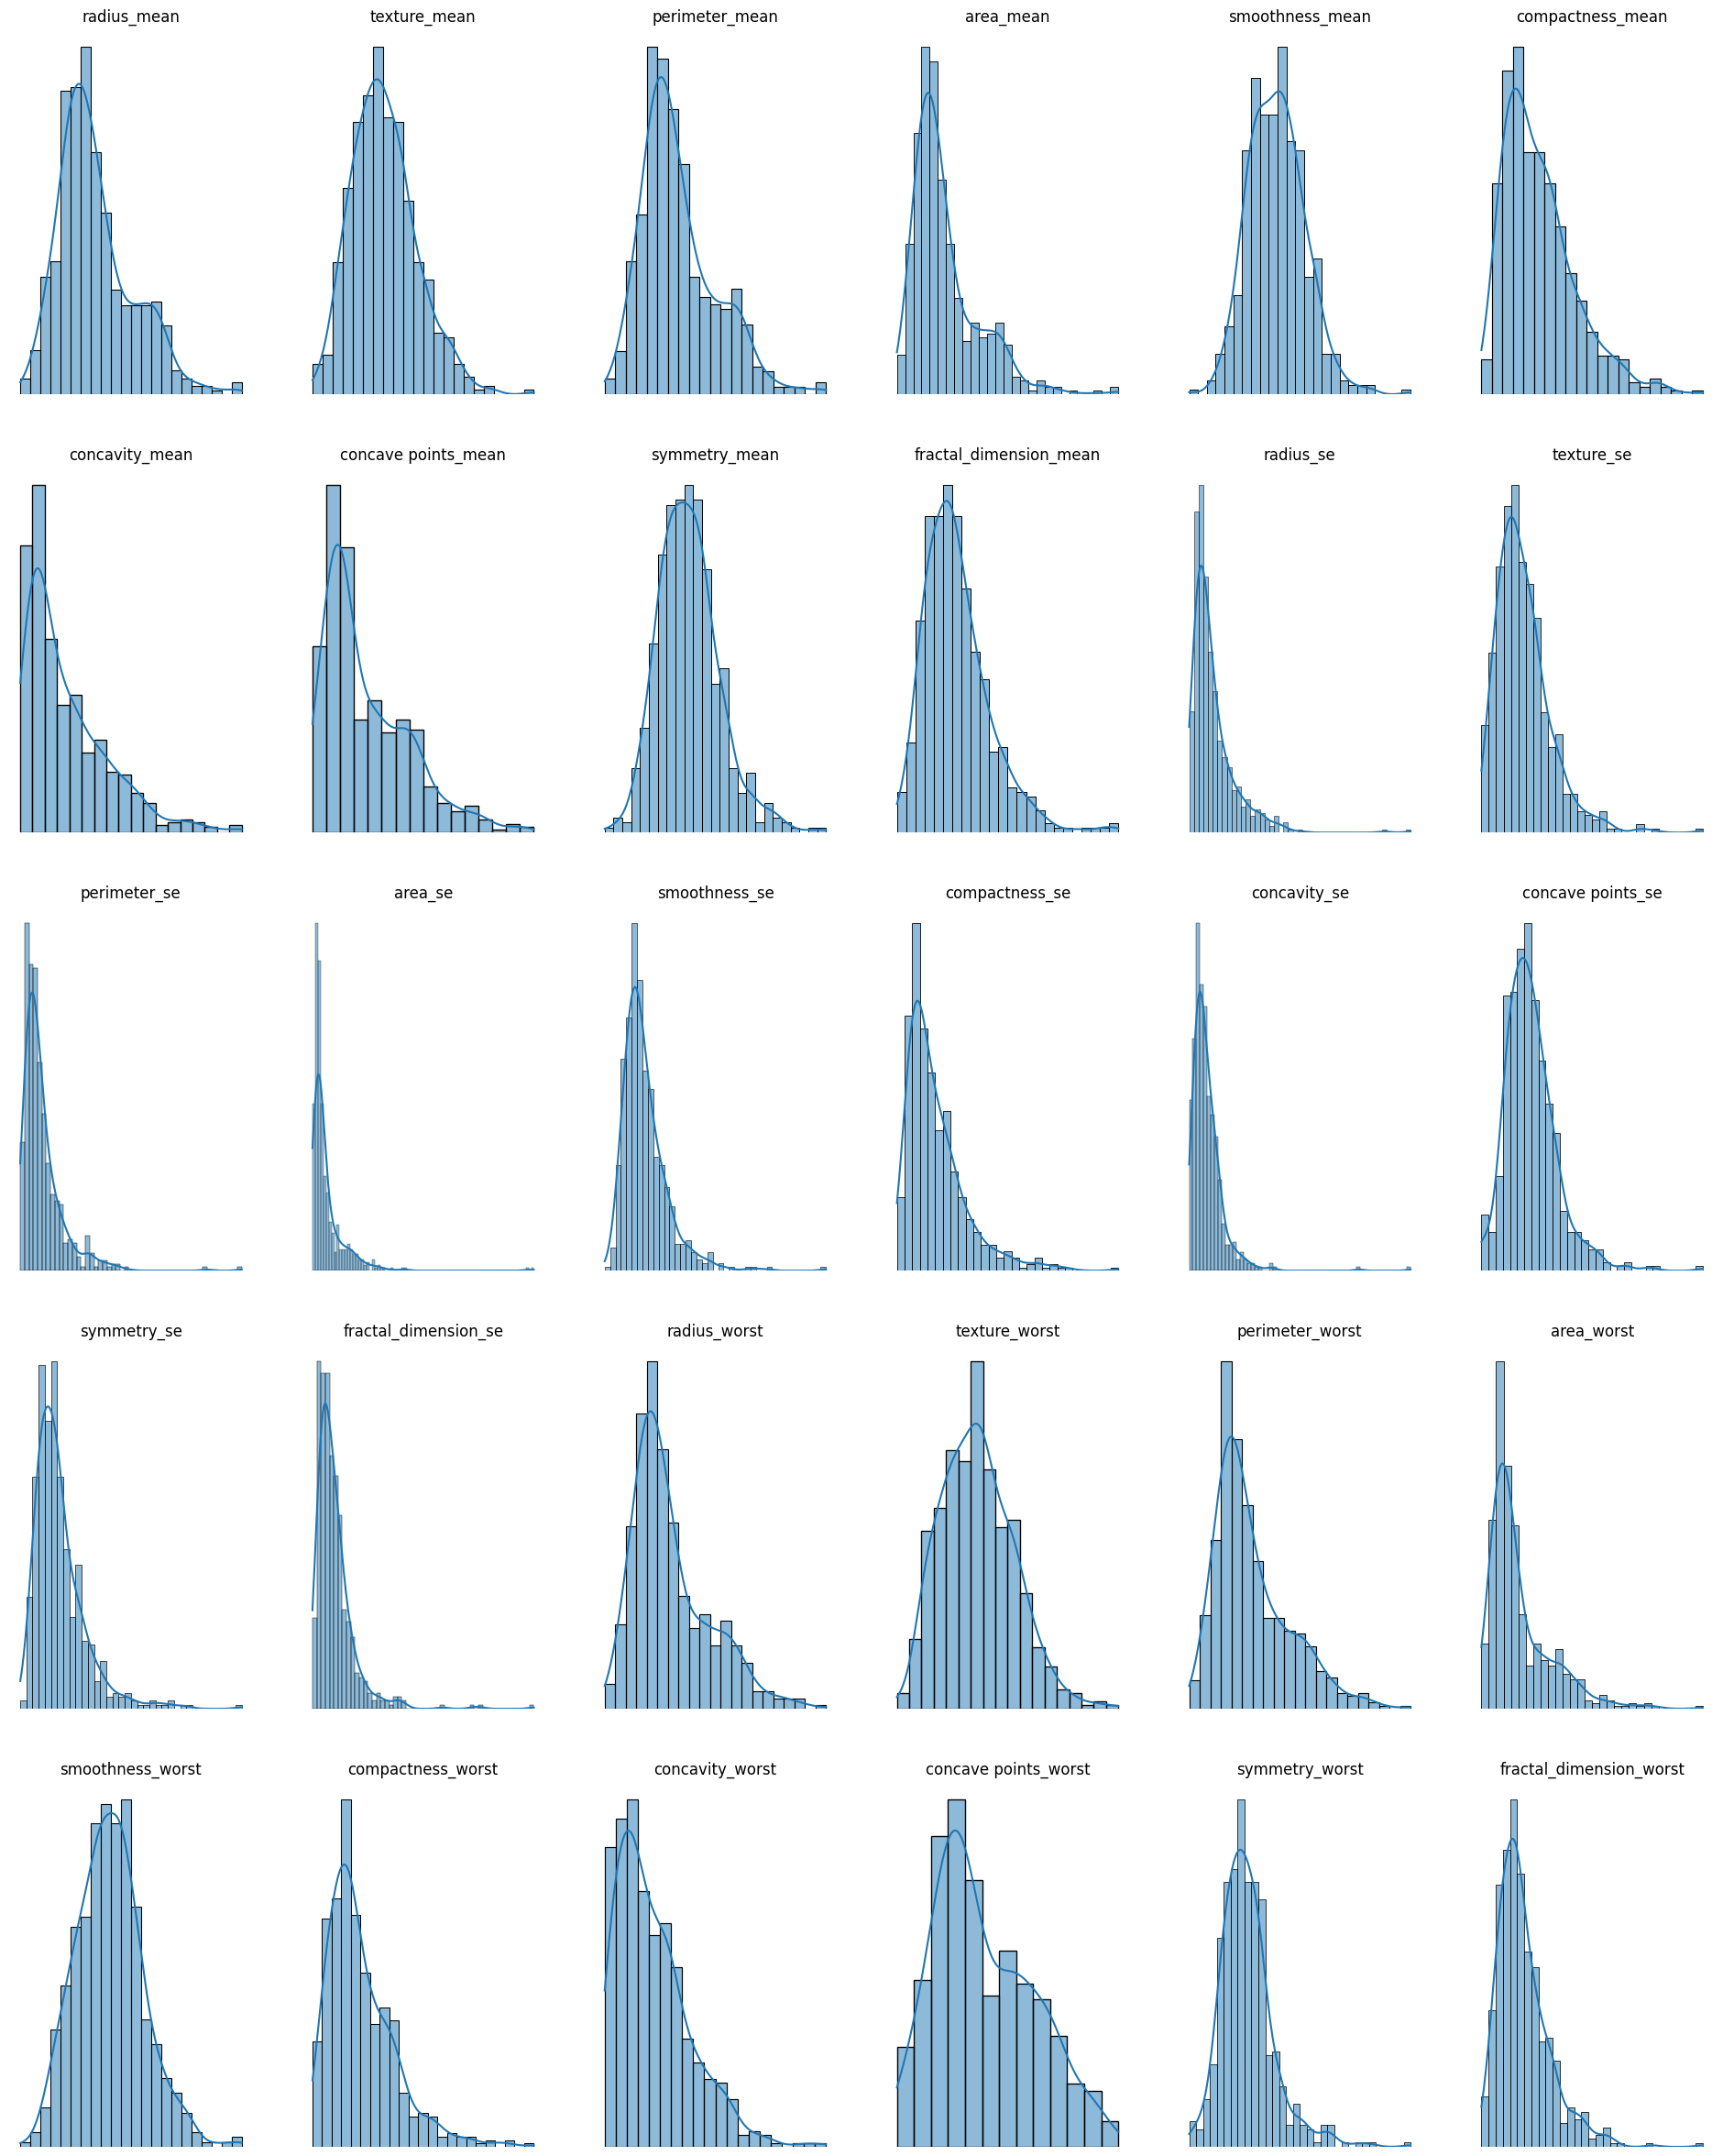

In [23]:
plt.figure(figsize=(24,30))
for i in range(2,data.shape[1]-1):
    plt.subplot(5,6,i-1)
    plt.axis(False)  
    plt.title(data.columns[i])
    sns.histplot(data.iloc[:,i],kde=True)

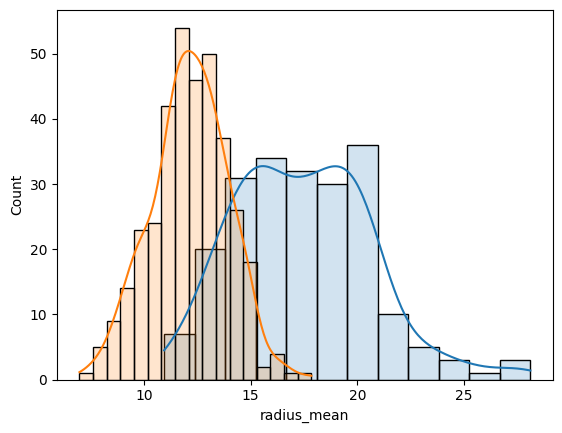

In [24]:
sns.histplot(data[data['diagnosis'] =="M"]['radius_mean'],kde=True,alpha=0.2)
sns.histplot(data[data['diagnosis'] =="B"]['radius_mean'],kde=True,alpha=0.2)
plt.show()


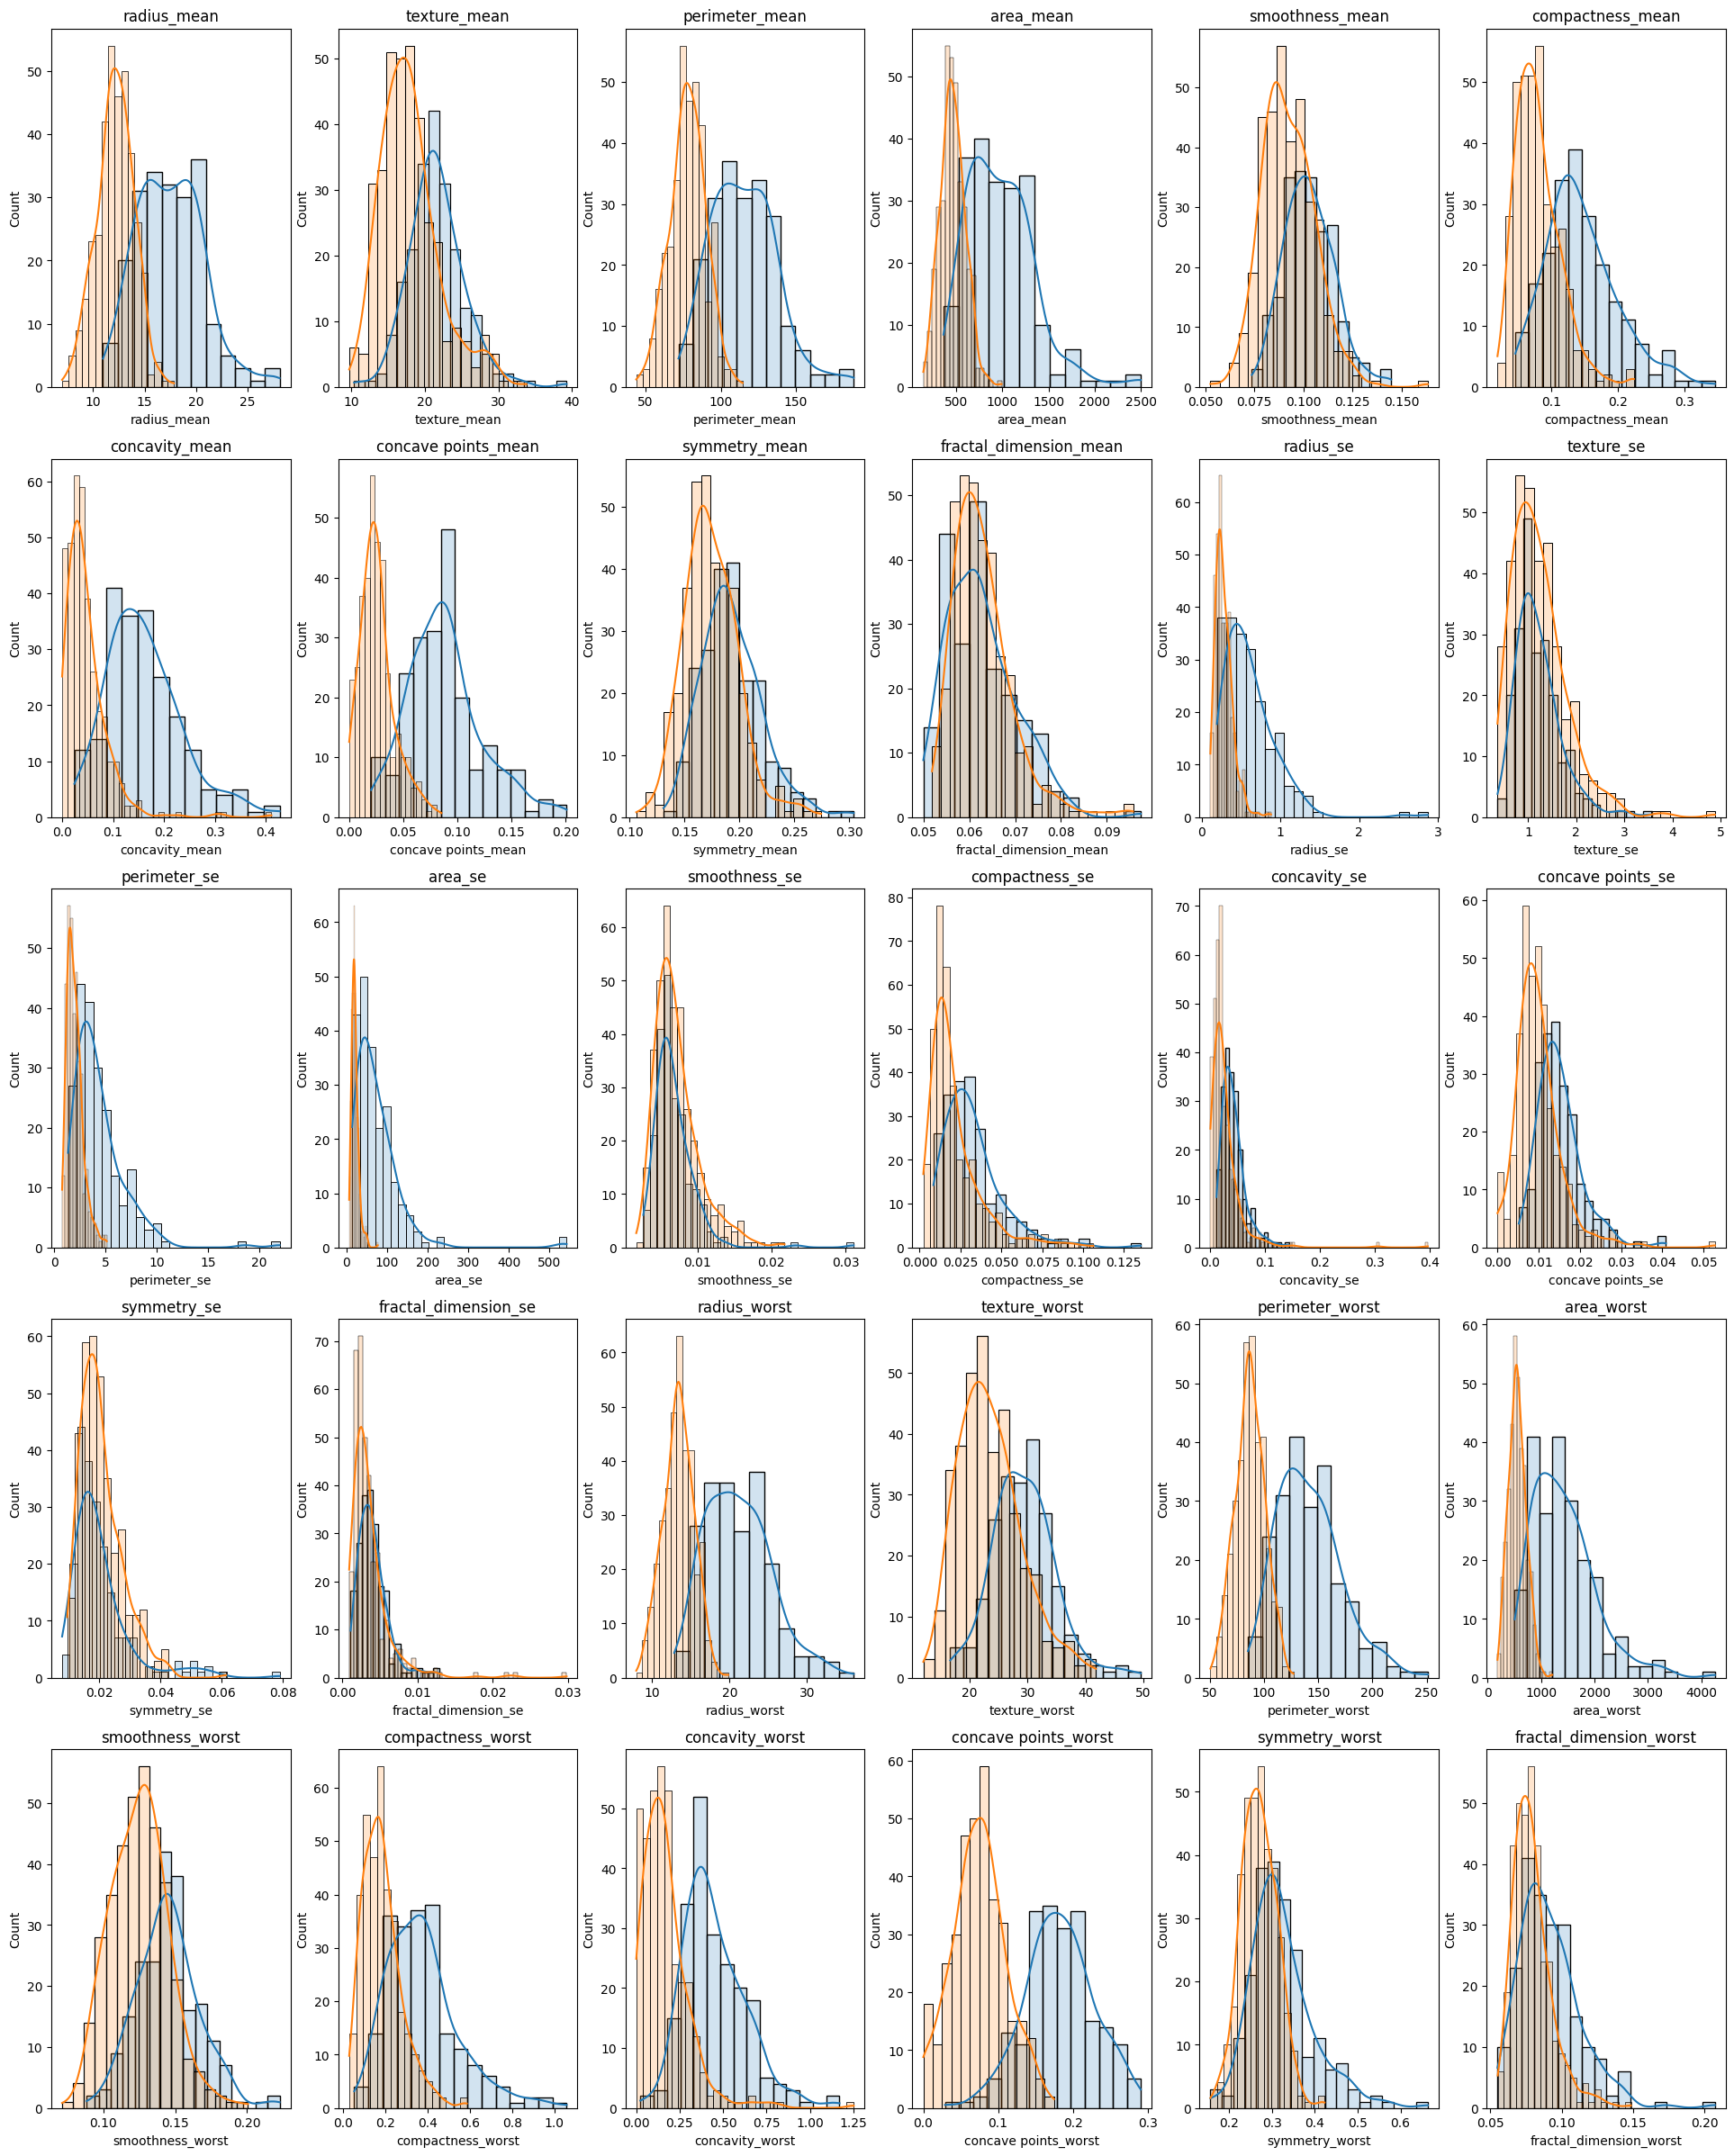

In [25]:
plt.figure(figsize=(24,30))
for i in range(2,32):
    plt.subplot(5,6,i-1)
    plt.title(data.columns[i])
    sns.histplot(data[data['diagnosis'] =="M"][data.columns[i]],kde=True,alpha=0.2)
    sns.histplot(data[data['diagnosis'] =="B"][data.columns[i]],kde=True,alpha=0.2)

#### Exploring Binary Data 

In [26]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Pie Chart

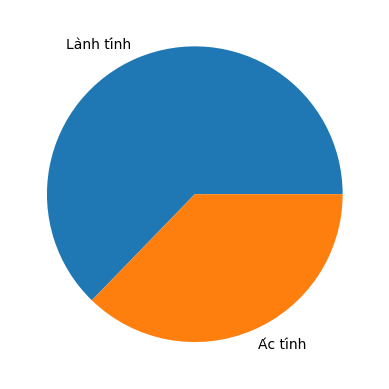

In [27]:
labels = ['Lành tính',"Ác tính"]
plt.pie(data['diagnosis'].value_counts().values,labels = labels)
plt.show()

Bar Chart

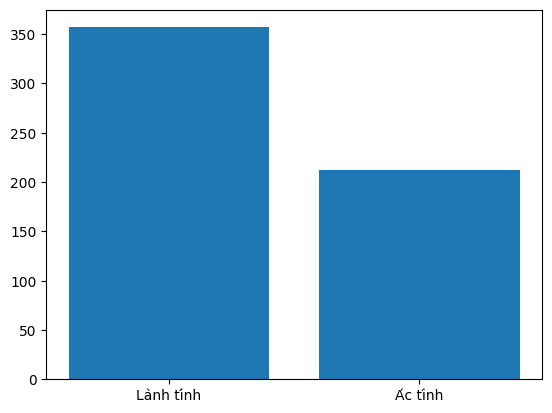

In [28]:
labels = ['Lành tính',"Ác tính"]
plt.bar(labels,data['diagnosis'].value_counts().values)
plt.show()

## Correlation

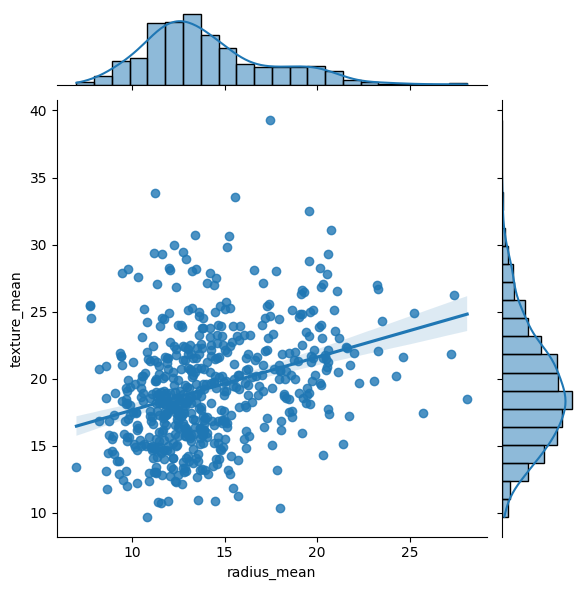

In [29]:
sns.jointplot(x=data.columns[2],y=data.columns[3],data=data,kind ="reg")

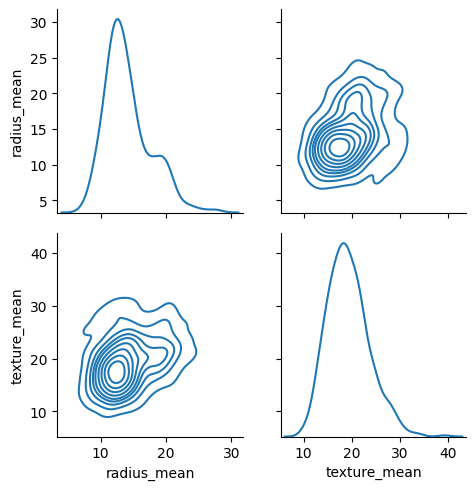

In [30]:
g = sns.PairGrid(data.iloc[:,2:4],diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.kdeplot)
g.map_diag(sns.kdeplot)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9660\3062935436.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)


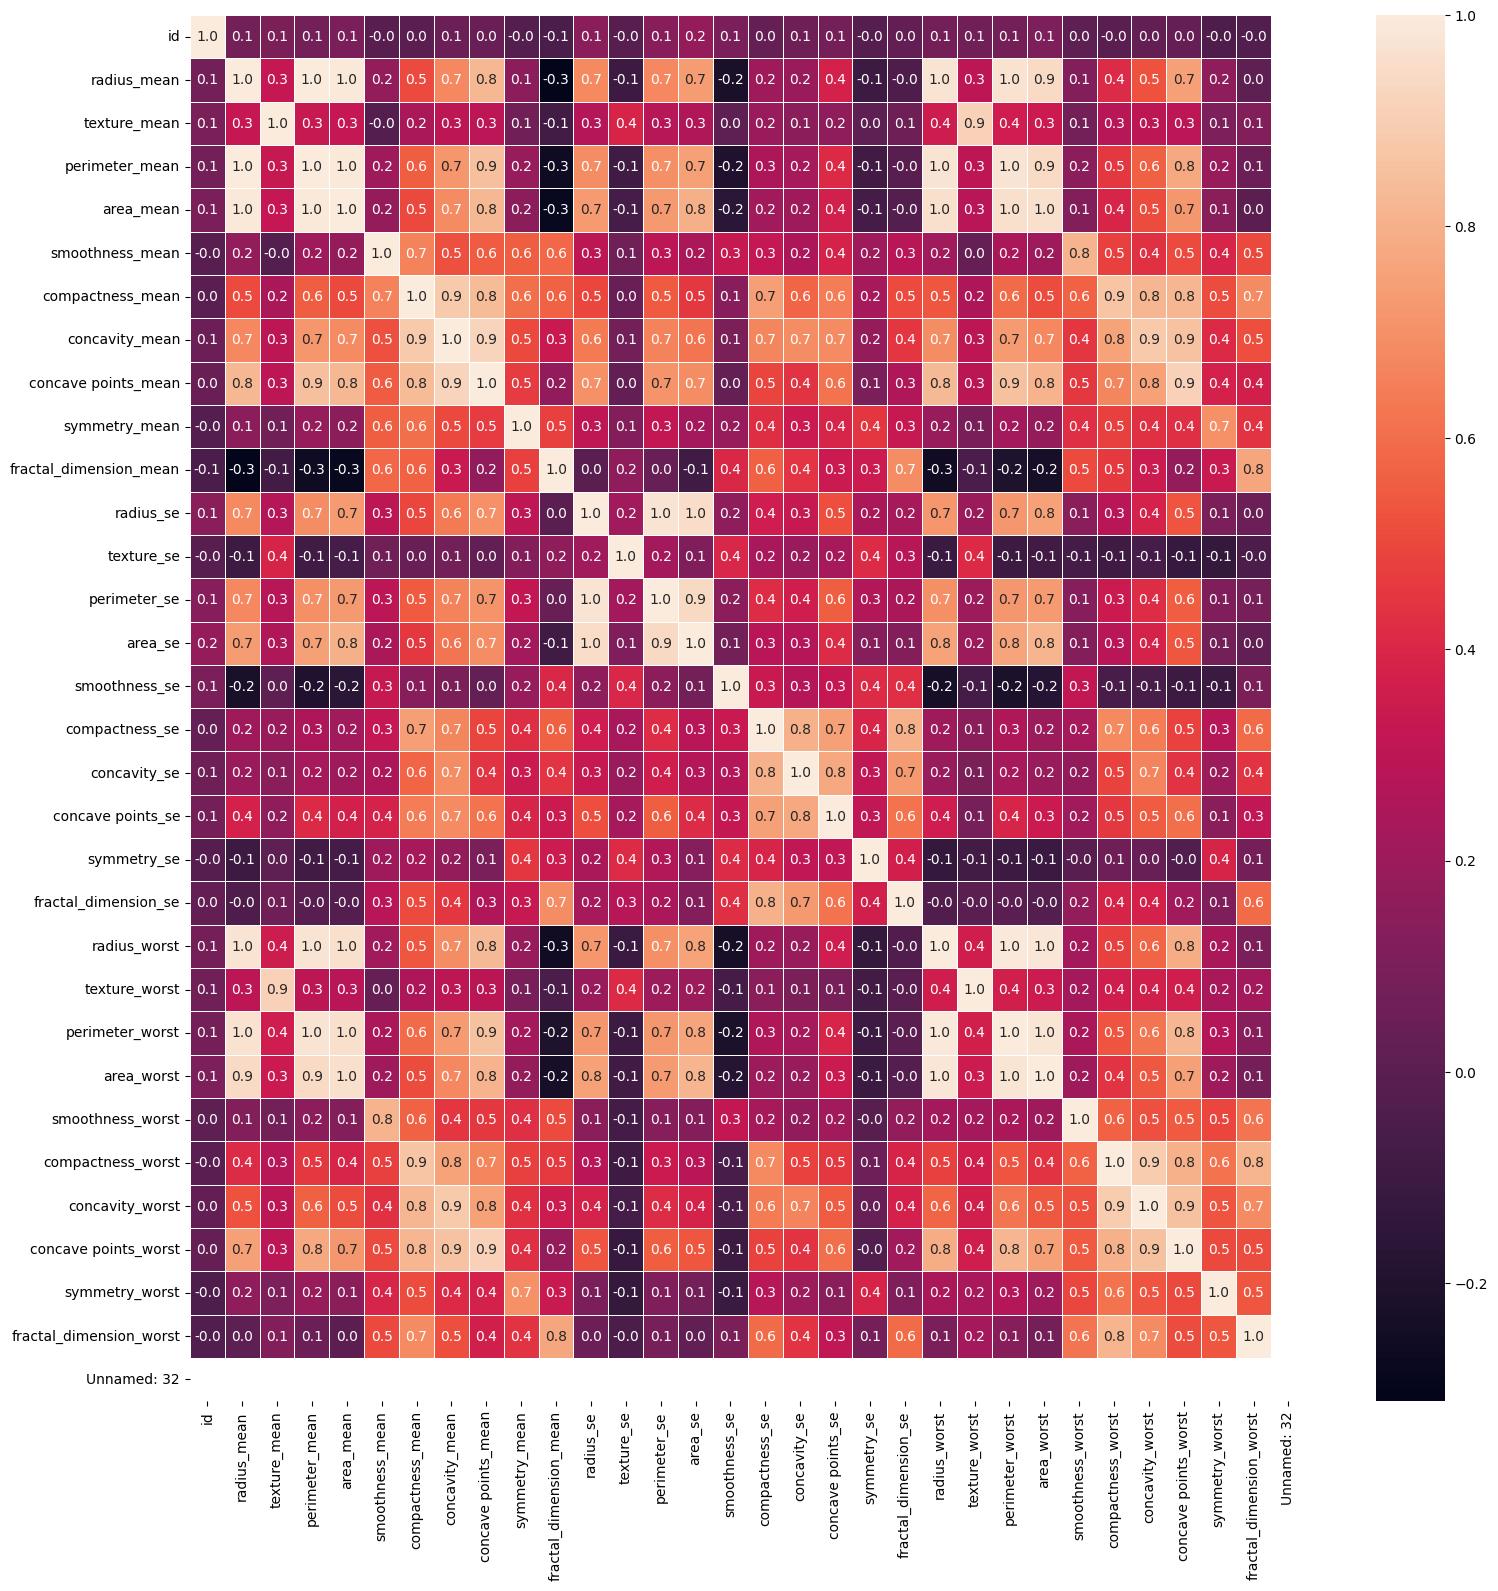

In [31]:
f,ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

### Before use Reduce Dimension 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
X = data.iloc[:,2:32]
Y = data.iloc[:,1]

In [34]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [35]:
Y =np.where(Y=='M',0,1)

In [36]:
X.shape,Y.shape

((569, 30), (569,))

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [38]:
log = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
ran = RandomForestClassifier(random_state=42)
tree = DecisionTreeClassifier(random_state=42)

In [39]:
log.fit(x_train,y_train)
svm.fit(x_train,y_train)
ran.fit(x_train,y_train)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
model={"Logistic Regression":log,
        "Support Vector Machine ":svm,
        "Random Forest" :ran,
        "Decision Tree":tree}

In [41]:
print("Accuracy score of Logistic Regression: ",log.score(x_test,y_test))
print("Accuracy score of Support Vector Machine : ",svm.score(x_test,y_test))
print("Accuracy score of Random Forest: ",ran.score(x_test,y_test))
print("Accuracy score of Decision Tree: ",tree.score(x_test,y_test))

Accuracy score of Logistic Regression:  0.9824561403508771
Accuracy score of Support Vector Machine :  0.9912280701754386
Accuracy score of Random Forest:  0.9912280701754386
Accuracy score of Decision Tree:  0.956140350877193


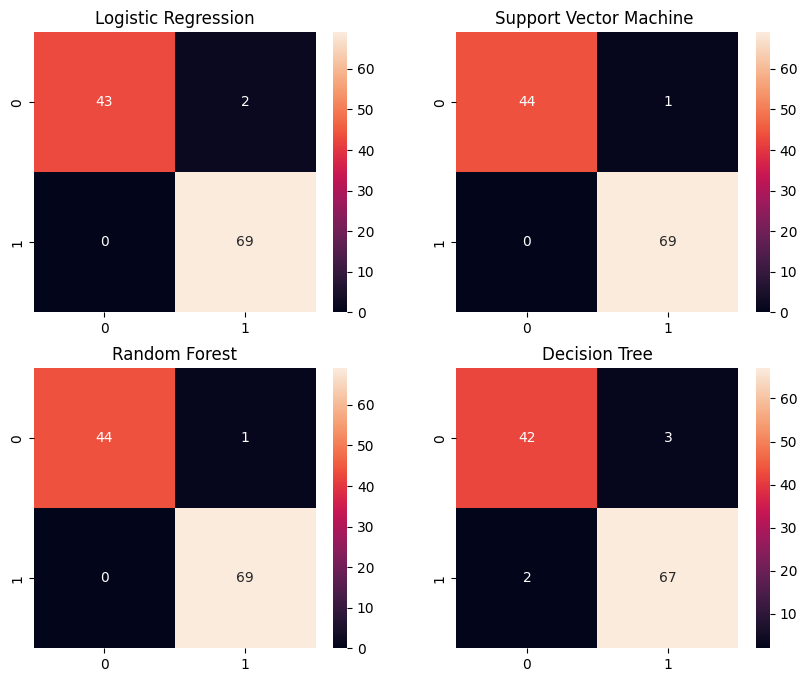

In [42]:
plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    cm = confusion_matrix(y_test,list(model.values())[i].predict(x_test))
    sns.heatmap(cm,annot=True,fmt='d')
    plt.title(list(model.keys())[i])

### Feature Selection 

Select K best

In [43]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score 
import time

In [44]:
k = [5,10,15,20,25]

In [45]:
log = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
ran = RandomForestClassifier(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
log_score = []
ran_score = []
svm_score = []
tree_score = []

In [46]:
time_log = []
time_svm = []
time_ran = []
time_tree = []

In [47]:
for i in range(len(k)):
    select = SelectKBest(chi2,k=k[i])
    X_new = select.fit_transform(X,Y)
    print("Feature Selection: ",np.where(select.get_support())[0])
    time1= time.time()
    log_score.append(cross_val_score(log,X_new,Y,cv =10).mean())
    time2 = time.time()
    svm_score.append(cross_val_score(svm,X_new,Y,cv =10).mean())
    time3= time.time()
    ran_score.append(cross_val_score(ran,X_new,Y,cv =10).mean())
    time4= time.time()
    tree_score.append(cross_val_score(tree,X_new,Y,cv =10).mean())
    time5= time.time()
    time_log.append(time2-time1)
    time_svm.append(time3-time2)
    time_ran.append(time4-time3)
    time_tree.append(time5-time4)

Feature Selection:  [ 6  7 22 23 27]
Feature Selection:  [ 0  2  3  6  7 20 22 23 26 27]
Feature Selection:  [ 0  2  3  5  6  7 10 12 13 20 22 23 25 26 27]
Feature Selection:  [ 0  1  2  3  5  6  7 10 12 13 17 20 21 22 23 24 25 26 27 28]
Feature Selection:  [ 0  1  2  3  4  5  6  7  8 10 12 13 15 16 17 20 21 22 23 24 25 26 27 28
 29]


[]

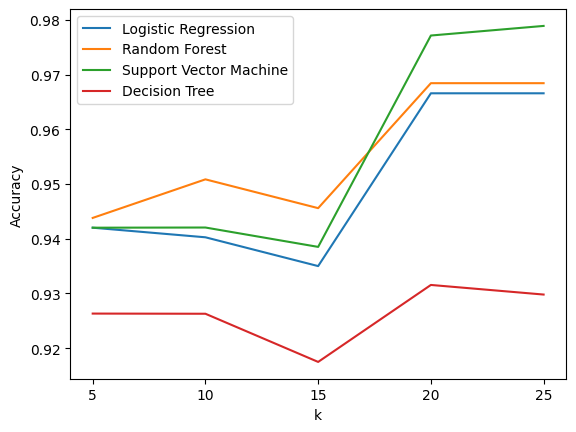

In [48]:
plt.plot(k, log_score, label='Logistic Regression')
plt.plot(k, ran_score, label='Random Forest')
plt.plot(k, svm_score, label='Support Vector Machine')
plt.plot(k, tree_score, label='Decision Tree')
plt.xlabel('k')
plt.xticks(k)
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

[]

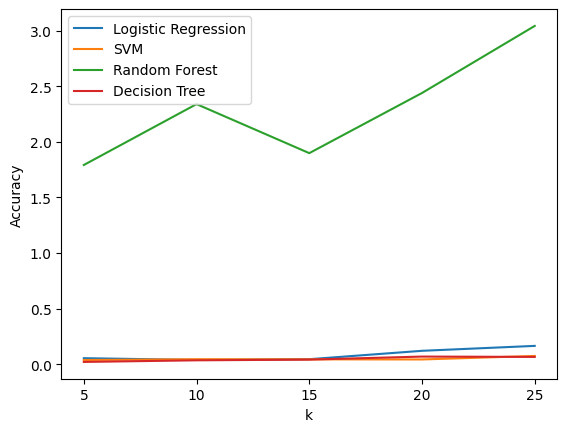

In [49]:
plt.plot(k, time_log, label='Logistic Regression')
plt.plot(k, time_svm, label='SVM')
plt.plot(k, time_ran, label='Random Forest')
plt.plot(k, time_tree, label='Decision Tree')
plt.xlabel('k')
plt.xticks(k)
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

### Feature Extraction

PCA

In [50]:
X.shape,Y.shape

((569, 30), (569,))

In [51]:
from sklearn.decomposition import PCA


In [52]:
log = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
ran = RandomForestClassifier(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
log_score = []
ran_score = []
svm_score = []
tree_score = []

In [53]:
for i in k:
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
    pca = PCA(n_components=i)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    log = log.fit(x_train,y_train)
    log_score.append(log.score(x_test,y_test))
    svm = svm.fit(x_train,y_train)
    svm_score.append(svm.score(x_test,y_test))
    ran= ran.fit(x_train,y_train)
    ran_score.append(ran.score(x_test,y_test))
    tree = tree.fit(x_train,y_train)
    tree_score.append(tree.score(x_test,y_test))


[]

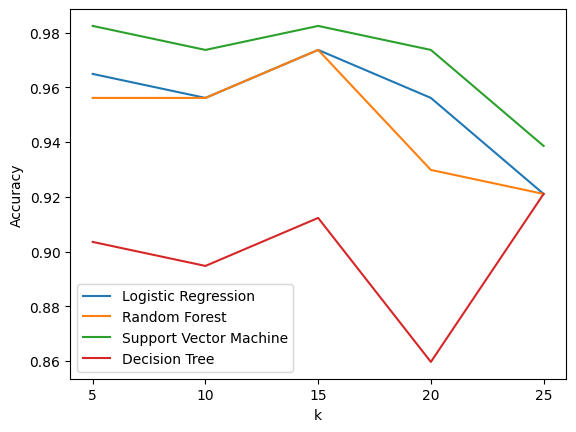

In [54]:
plt.plot(k, log_score, label='Logistic Regression')
plt.plot(k, ran_score, label='Random Forest')
plt.plot(k, svm_score, label='Support Vector Machine')
plt.plot(k, tree_score, label='Decision Tree')
plt.xlabel('k')
plt.xticks(k)
plt.ylabel('Accuracy')
plt.legend()
plt.plot()